# Линейная регрессия

## Теоретическая часть

## Построение предсказаний

__Вспомнить из лекции:__
* Как выполняются предсказания с помощью модели линейной регрессии?
* Как интерпретировать веса в модели линейной регрессии?

### **Задача 1**.

Какие предсказания сделает линейная модель

$$a(x) = w_1 x_1 + w_2 x_2 + w_3 x_3 + b$$

для объекта $x = (7, -3, 2)$, вектора весов $w = (0.5, 1.5, -2)$ и сдвига $b=10$?



In [50]:
# Код для получения ответа.
# Пояснения обязательны!
a_x = 7 * 0.5 + (-3) * 1.5 + 2 * (-2) + 10
print(f'a(x) = {a_x}')

a(x) = 5.0


### **Задача 2**.

Дана матрица $X$ размера $\ell \times (d+1)$, $\ell$ - число объектов, $(d+1)$ - число признаков. В матрицу $X$ входит константный признак, который равен 1 для всех объектов. Также дан вектор весов $w$ длины $(d+1)$. Записать в матричном виде (через матричное произведение), как будут выполняться предсказания для этой матрицы.

Указать размерности всех матриц, входящих в формулу, проверить корректность выполнения матричных операций (с точки зрения размерности).

**Решение задачи 2:** 

текст решения

Строка - описание объекта,
столбец - значение признака на разных объектах (X)

$X = \begin{pmatrix}
     x_{11} & x_{12} & ... & x_{1m} \\
     x_{21} & x_{22} & ... & x_{2m} \\
     . . . &  . . . & . . . & . . .  \\
     x_{n1} & x_{n2} & ... & x_{nm}
     \end{pmatrix}$ , n = $\ell$, m = $(d+1)$


$w = \begin{pmatrix}
     w_{1} \\
     w_{2} \\
     ... \\
     w_{m} \\
     \end{pmatrix} $ , m = $(d+1)$

$
   𝑿 * w =
   \begin{pmatrix}
    x_{11}*w_{1} & + & ... & + & x_{1m}*w_{m} \\
    x_{21}*w_{1} & + & ... & + & x_{2m}*w_{m} \\
   . . . &  +  & . . . & +  & . . .  \\
    x_{n1}*w_{1} & + & . . . & + & x_{nm}*w_{m} \\
   \end{pmatrix} $

### **Задача 3**.

Визуализируйте решающее правило для $d=1$, $w_1=3$, $w_0=-2$. За что отвечает сдвиг $w_0$? Почему исключение сдвига из модели $w_0=0$, скорее всего, ухудшит качество предсказаний?

In [51]:
import numpy as np
import matplotlib.pyplot as plt

def predict_feature(features, weight, bias):
    return weight*features + bias
"""
переделать на 3D график
"""
def present_plot(x, y):
    plt.plot(x, y, 'o')
    plt.plot([-3, 3], [0, 0], linestyle="-")
    weight, bias = np.polyfit(x, y, 1)
    print(weight, bias)
    plt.plot(x, predict_feature(features=x, weight=weight, bias=bias))

$$a(x) = 3 x_1 -2$$

2.9999999999999996 -2.0000000000000004


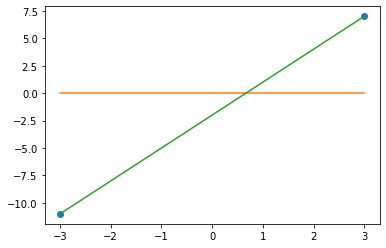

In [52]:
# Код, реализующий визуализацию.
# Пояснения обязательны!
x = np.array([-3, 3])
y = np.array([-11, 7])
present_plot(x=x, y=y)

$$a(x) = 3 x_1 $$

𝒘𝟎 - ордината точки пересечения прямой с осью ордина

2.9999999999999996 0.0


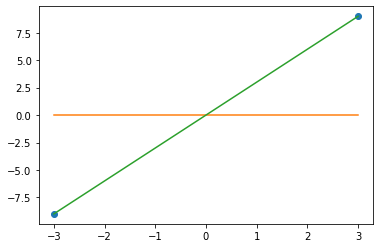

In [53]:
# Код, реализующий визуализацию.
# Пояснения обязательны!
x = np.array([-3, 3])
y = np.array([-9, 9])
present_plot(x=x, y=y)

### **Вопрос:** 

Какой геометрический объект задает решающее правило линейной регрессии в трехмерном случае (два признака)? В многомерном случае (больше двух признаков)?


**Ответ на вопрос:** 

текст ответа


## Обучение линейной регрессии
__Вспомнить из лекции:__
* Как выполняется обучение линейной регрессии на основе среднеквадратической ошибки? 
* Какой функционал при этом минимизируется?
* Как выглядит аналитическое решение задачи обучения (формула для определения весов)?
* Почему на практике не используется аналитическое решение?
* Каков оптимизационный алгоритм (как рассчитываются веса)?

### **Задача 4**.

Даны матрица объекты-признаки $X$ размера $\ell \times (d+1)$, вектор правильных ответов $Y$ длины $\ell$ и вектор весов $w$ длины $(d+1)$, $\ell$ - число объектов, $(d+1)$ - число признаков. Указать все ошибки, допущенные в записи выражения для среднеквадратичной ошибки:

$$\| Xw - Y \| = \frac 1 \ell \sum_{j=1}^d \bigl ( \sum_{i=1}^\ell x_{ij} w_{j} - y_j   \bigr )^2$$

Записать правильное выражение.


**Решение задачи 4:** 

Ошибки:
1. 
2. 
3. 

Правильное выражение:


## Практическая часть

Реализуем класс линейной регрессии, соответствующий интерфейсу **sklearn**, в котором обучение будет реализовано путем применения аналитического метода. 

Тестирование класса выполним на наборе данных **boston** (хранится в модуле **datasets**), который содержит характеристики и стоимость домов.

In [54]:
import numpy as np

In [55]:
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [56]:
# Загрузка набора данных и вывод информации о ключах (характеризуют содержимое набора)
boston = load_boston()
boston.keys()

e:\pycharmprojects\machine_learning\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California h

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [57]:
# Формирование матрицы признаков и вектора ответов
X = boston["data"]
y = boston["target"]

In [58]:
X

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [59]:
X.shape

(506, 13)

Добавьте единичный столбец в X и сохраните результат в переменную X_with1:

In [60]:
### Код, реализующий добавление единичного столбца
# (506, 13) -> (506, 14)


In [61]:
X_with1

NameError: name 'X_with1' is not defined

Разделим обе выборки на обучение и контроль, зафиксировав random_state, чтобы разбиение в обоих случаях выполнялось одинаково:

In [ ]:
X_tr, X_te, y_tr, y_te = train_test_split(X, y, random_state=10)
X_tr_with1, X_te_with1, y_tr, y_te = train_test_split(X_with1, y, random_state=10)

In [ ]:
X_tr.shape, y_tr.shape, X_tr_with1.shape, X_te_with1.shape

Реализуйте методы **fit** и **predict**. Интерфейс соответствует стандартному интерфейсу **sklearn**. 

Напоминание: в машинном обучении классы удобно использовать, чтобы сохранять значения параметров внутри класса после обучения. У класса две основные функции: **fit** (производит обучение по обучающей выборке) и **predict** (выполняет предсказания для заданной выборки). Функция **fit** вызывается один раз, после чего параметры (в данном случае веса) сохраняются внутри класса. После обучения можно много раз вызывать функцию **predict**, чтобы выполнять предсказания на разных выборках. При этом будут использоваться сохраненные внутри класса веса. 

В методе **fit** нужно реализовать вычисление весов по формуле $w = (X^T X)^{-1} X^T Y$ и сохранить в self., в методе **predict** - вернуть предсказания по формуле $X w$ (см. задачи выше), используя сохраненный вектор весов. 

In [ ]:
class LinearRegression:
    def __init__(self, learning_method="analytical"):
        self.learning_method = learning_method
        
    def fit(self, X, y):
        if self.learning_method == "analytical":
            ### код, реализующий вычисление весов
            
        else:
            pass
            
    def predict(self, X):
        ### код, реализующий получение предсказаний
        
        return 

Проверим качество работы полученной модели. Сравним работу модели с константным признаком и без него.

In [ ]:
regr = LinearRegression("analytical")
regr.fit(X_tr, y_tr)
print("train error:", mean_squared_error(regr.predict(X_tr), y_tr))
print("test error:", mean_squared_error(regr.predict(X_te), y_te))

In [ ]:
regr = LinearRegression("analytical")
regr.fit(X_tr_with1, y_tr)
print("train error:", mean_squared_error(regr.predict(X_tr_with1), y_tr))
print("test error:", mean_squared_error(regr.predict(X_te_with1), y_te))

Как и следовало ожидать, качество работы алгоритма с константным признаком лучше, чем без него ($w_0=0$).

Качество работы алгоритма на тестовых данных хуже, чем на обучающей выборке - это стандартная ситуация в машинном обучении.

### **Дополнительное задание**

Реализовать обучение линейной регрессии с помощью градиентного спуска. В этом случае следует дополнительно учесть следующие моменты.
* Выборку X необходимо масштабировать (можно использовать sklearn.preprocessing.Normalizer)
* Длину шага нужно настроить так, чтобы градиентный спуск не расходился (начать с большой, с постепенным уменьшением). Рекомендация: контролировать изменение ошибки в процессе обучения.
* Может понадобиться выполнить большое число итераций (порядка миллиона).

**Внимание:** все вычисления - ТОЛЬКО В МАТРИЧНОЙ ФОРМЕ. Циклы можно использовать только для организации итераций.